In [1]:
import pandas as pd
import os 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Arial'

In [15]:
def subs(x):
    if x<0:
        return -x
    elif x>0:
        return 0
    else:
        return x

In [49]:
wages=pd.read_excel('0928 shoes data and codebook.xlsx',sheet_name='wages')
# prod=pd.read_excel('orderproductiondata2.xlsx')
prod=pd.read_excel('0928 shoes data and codebook.xlsx',sheet_name='prod')
prod.head(3)

,batch,artno,OrderDate,customername,country,order,price,currencyunit,priceUSD,payment_mode,...,conveyor,chargedon,stylecode,last,PlannedMin,PlannedHrs,extendtime,extenddelivery,extenddlymonth,leadtime
0,192346,second shoes,2021-12-16,Crown FCSL JW,INDIA,Kenmore F/S Jobwork-Scanning,15.0,USD,15.0,0,...,C-6,2021-12-18 12:20:10,893,-----,36.18,0.603000,2022-01-15,2022-01-15,1,8
1,192347,second shoes,2021-12-16,Crown FCSL JW,INDIA,Kenmore F/S Jobwork-Scanning,15.0,USD,15.0,0,...,C-6,2021-12-18 12:20:36,893,-----,10.72,0.178667,2022-01-15,2022-01-15,1,8
2,192351,second shoes,2021-12-16,Crown FCSL JW,INDIA,Kenmore F/S Jobwork-Scanning,15.0,USD,15.0,0,...,C-6,2021-12-18 12:38:37,893,-----,50.25,0.837500,2022-01-15,2022-01-15,1,8


In [40]:
prod=prod.loc[:prod[prod.pairs.isna()].index.min()-1, :]

In [50]:
allConveyors=wages.conveyor.unique()

## `allcus`, `cus*`, `cus*ps`, shares, avgPrices

In [51]:
prod['totalSale']=prod.priceUSD * prod.pairs
wages.attrition=wages.groupby('conveyor').workers.pct_change().apply(subs)

for i in range(0,3):
        wages[f'cus{i+1}price']=pd.NA

for i,r in wages.iterrows():
    conveyor=r.conveyor
    month=r.month
    prod_filtered=prod[(prod.conveyor==conveyor)&(prod.extenddlymonth==month)]
    # prod_filtered=prod[(prod.conveyor==conveyor)&(prod.chargemonth==month)]
    info=prod_filtered.groupby('buyername')[['totalSale','pairs']].agg('sum').sort_values('pairs',ascending=0).to_dict()
    totalSale=info['totalSale']
    totalPairs=info['pairs']
    avgPrices=dict(zip(totalSale.keys(), [totalSale[x]/totalPairs[x] for x in totalSale.keys()]))
    try:
        totalAvgPrice=sum(totalSale.values())/sum(totalPairs.values())
    except ZeroDivisionError:
        totalAvgPrice=pd.NA

    try:
            minAvgPrice=min(avgPrices.values())
            maxAvgPrice=max(avgPrices.values())
    except ValueError:
            minAvgPrice=pd.NA
            maxAvgPrice=pd.NA  
            
    wages.loc[i,'allps']=sum(totalPairs.values())
    for rank in range(0,6):
        try:
            wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
            wages.loc[i,f'cus{rank+1}ps']=totalPairs[list(totalPairs.keys())[rank]]
        except:
            continue
    
    # avgPrices
    for ii in range(0,3):
        try:
            wages.loc[i, f'cus{ii+1}price']=list(avgPrices.values())[ii]
        except:
            continue

    wages.loc[i, "avgprice"]=totalAvgPrice
    wages.loc[i, "minprice"]=minAvgPrice
    wages.loc[i, "maxprice"]=maxAvgPrice

    # numbuyers,numstyles,numartno, numbatches
    wages.loc[i, "numbuyers"]=prod_filtered.buyername.nunique()
    wages.loc[i, "numstyles"]=prod_filtered.stylecode.nunique()
    wages.loc[i, "numartno"]=prod_filtered.artno.nunique()
    wages.loc[i, "numbatches"]=prod_filtered.batch.nunique()

# share
wages['cus1share']=(wages.cus1ps/wages.allps)*100
wages

C:\Users\JselZ\AppData\Local\Temp\ipykernel_5272\2096519058.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Curfu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
C:\Users\JselZ\AppData\Local\Temp\ipykernel_5272\2096519058.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Bull' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
C:\Users\JselZ\AppData\Local\Temp\ipykernel_5272\2096519058.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Rhino' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wag

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,avgprice,minprice,maxprice,numbuyers,numstyles,numartno,numbatches,cus6,cus6ps,cus1share
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,14562.0,Bull,5832.0,...,16.851480,15.208230,19.629999,4.0,13.0,9.0,20.0,NaN,NaN,58.665700
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,15436.0,Curfu,4114.0,...,17.616919,13.684322,18.878842,3.0,16.0,9.0,33.0,NaN,NaN,73.792906
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,18015.0,Rhino,12421.0,...,17.449033,16.420757,19.023271,3.0,14.0,8.0,29.0,NaN,NaN,57.281399
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,29389.0,Curfu,2766.0,...,20.026005,17.572722,21.450001,3.0,17.0,9.0,64.0,NaN,NaN,91.091963
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,30698.0,NaN,NaN,...,21.460913,21.460913,21.460913,1.0,10.0,5.0,28.0,NaN,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,6681.0,Rhino,144.0,...,16.006550,15.900431,20.930000,2.0,5.0,5.0,5.0,NaN,NaN,97.890110
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,8390.0,Rhino,906.0,...,18.477852,17.407154,21.442583,3.0,15.0,9.0,19.0,NaN,NaN,90.137516
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,8760.0,Sparky,1500.0,...,18.735139,17.407154,18.962534,2.0,12.0,6.0,15.0,NaN,NaN,85.380117


## `*ch`(change)

In [52]:
# wages['pschange']=wages.groupby('conveyor')['allps'].pct_change()*100
# wages['stylesch']=wages.groupby('conveyor')['numstyles'].pct_change()*100
# wages['artnoch']=wages.groupby('conveyor')['numartno'].pct_change()*100

wages['pschange']=wages.groupby('conveyor')['allps'].pct_change()*100
wages['stylesch']=wages.groupby('conveyor')['numstyles'].diff()
wages['artnoch']=wages.groupby('conveyor')['numartno'].diff()

wages

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,numbuyers,numstyles,numartno,numbatches,cus6,cus6ps,cus1share,pschange,stylesch,artnoch
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,14562.0,Bull,5832.0,...,4.0,13.0,9.0,20.0,NaN,NaN,58.665700,NaN,NaN,NaN
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,15436.0,Curfu,4114.0,...,3.0,16.0,9.0,33.0,NaN,NaN,73.792906,-15.727983,3.0,0.0
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,18015.0,Rhino,12421.0,...,3.0,14.0,8.0,29.0,NaN,NaN,57.281399,50.348982,-2.0,-1.0
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,29389.0,Curfu,2766.0,...,3.0,17.0,9.0,64.0,NaN,NaN,91.091963,2.585056,3.0,1.0
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,30698.0,NaN,NaN,...,1.0,10.0,5.0,28.0,NaN,NaN,100.000000,-4.850758,-7.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,6681.0,Rhino,144.0,...,2.0,5.0,5.0,5.0,NaN,NaN,97.890110,NaN,NaN,NaN
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,8390.0,Rhino,906.0,...,3.0,15.0,9.0,19.0,NaN,NaN,90.137516,36.380952,10.0,4.0
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,8760.0,Sparky,1500.0,...,2.0,12.0,6.0,15.0,NaN,NaN,85.380117,10.227761,-3.0,-3.0


# scores

In [53]:
scores=pd.read_excel("buyer scoring.xlsx",sheet_name='Sheet2')
scores=scores.replace(r"\xa0", '', regex=True)
scores=scores.set_index('buyer').to_dict()
scores

{'mbordering': {'Rhino': '3',
  'Bull': '3',
  'Crown': '3',
  'Sparky': '3',
  'T4 FSPL': '2',
  'Tampa': '3'},
 'mbleadtime': {'Rhino': '2',
  'Bull': '2',
  'Crown': '2',
  'Sparky': '2',
  'T4 FSPL': '1',
  'Tampa': '2'},
 'mbpricing': {'Rhino': '3',
  'Bull': '2.5',
  'Crown': '3',
  'Sparky': '2.5',
  'T4 FSPL': '1',
  'Tampa': '3'},
 'mbpay': {'Rhino': '1',
  'Bull': '2',
  'Crown': '2',
  'Sparky': '2',
  'T4 FSPL': '3',
  'Tampa': '3'}}

In [54]:
wages['cus1']=wages['cus1'].str.strip()
for score in list(scores.keys()):
    wages[score]=wages['cus1'].map(scores[score])

In [37]:
wages

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,cus6,cus6ps,cus1share,pschange,stylesch,artnoch,mbordering,mbleadtime,mbpricing,mbpay
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,12579.0,Rhino,11962.0,...,NaN,NaN,47.907225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,18270.0,Curfu,8524.0,...,NaN,NaN,54.739933,7119.0,10.0,-2.0,3,2,3,1
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,21435.0,Rhino,14011.0,...,NaN,NaN,58.901926,3015.0,-15.0,-7.0,NaN,NaN,NaN,NaN
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,21595.0,Curfu,146.0,...,NaN,NaN,98.837475,-14542.0,4.0,2.0,3,2,3,1
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,21284.0,NaN,NaN,...,NaN,NaN,100.000000,-565.0,-14.0,-3.0,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,Crown,685.0,NaN,NaN,...,NaN,NaN,100.000000,685.0,1.0,1.0,3,2,3,2
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,11017.0,Rhino,72.0,...,NaN,NaN,99.350708,NaN,NaN,NaN,3,2,3,2
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,4990.0,Rhino,618.0,...,NaN,NaN,88.980029,-5481.0,-11.0,-4.0,3,2,3,2
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,2532.0,Sparky,1512.0,...,NaN,NaN,62.611276,-1564.0,3.0,0.0,3,2,3,2


## export

In [55]:
# wages.to_csv('wages_final.csv',index=0)
wages.to_csv('wages_extend_month.csv',index=0)

## scatter

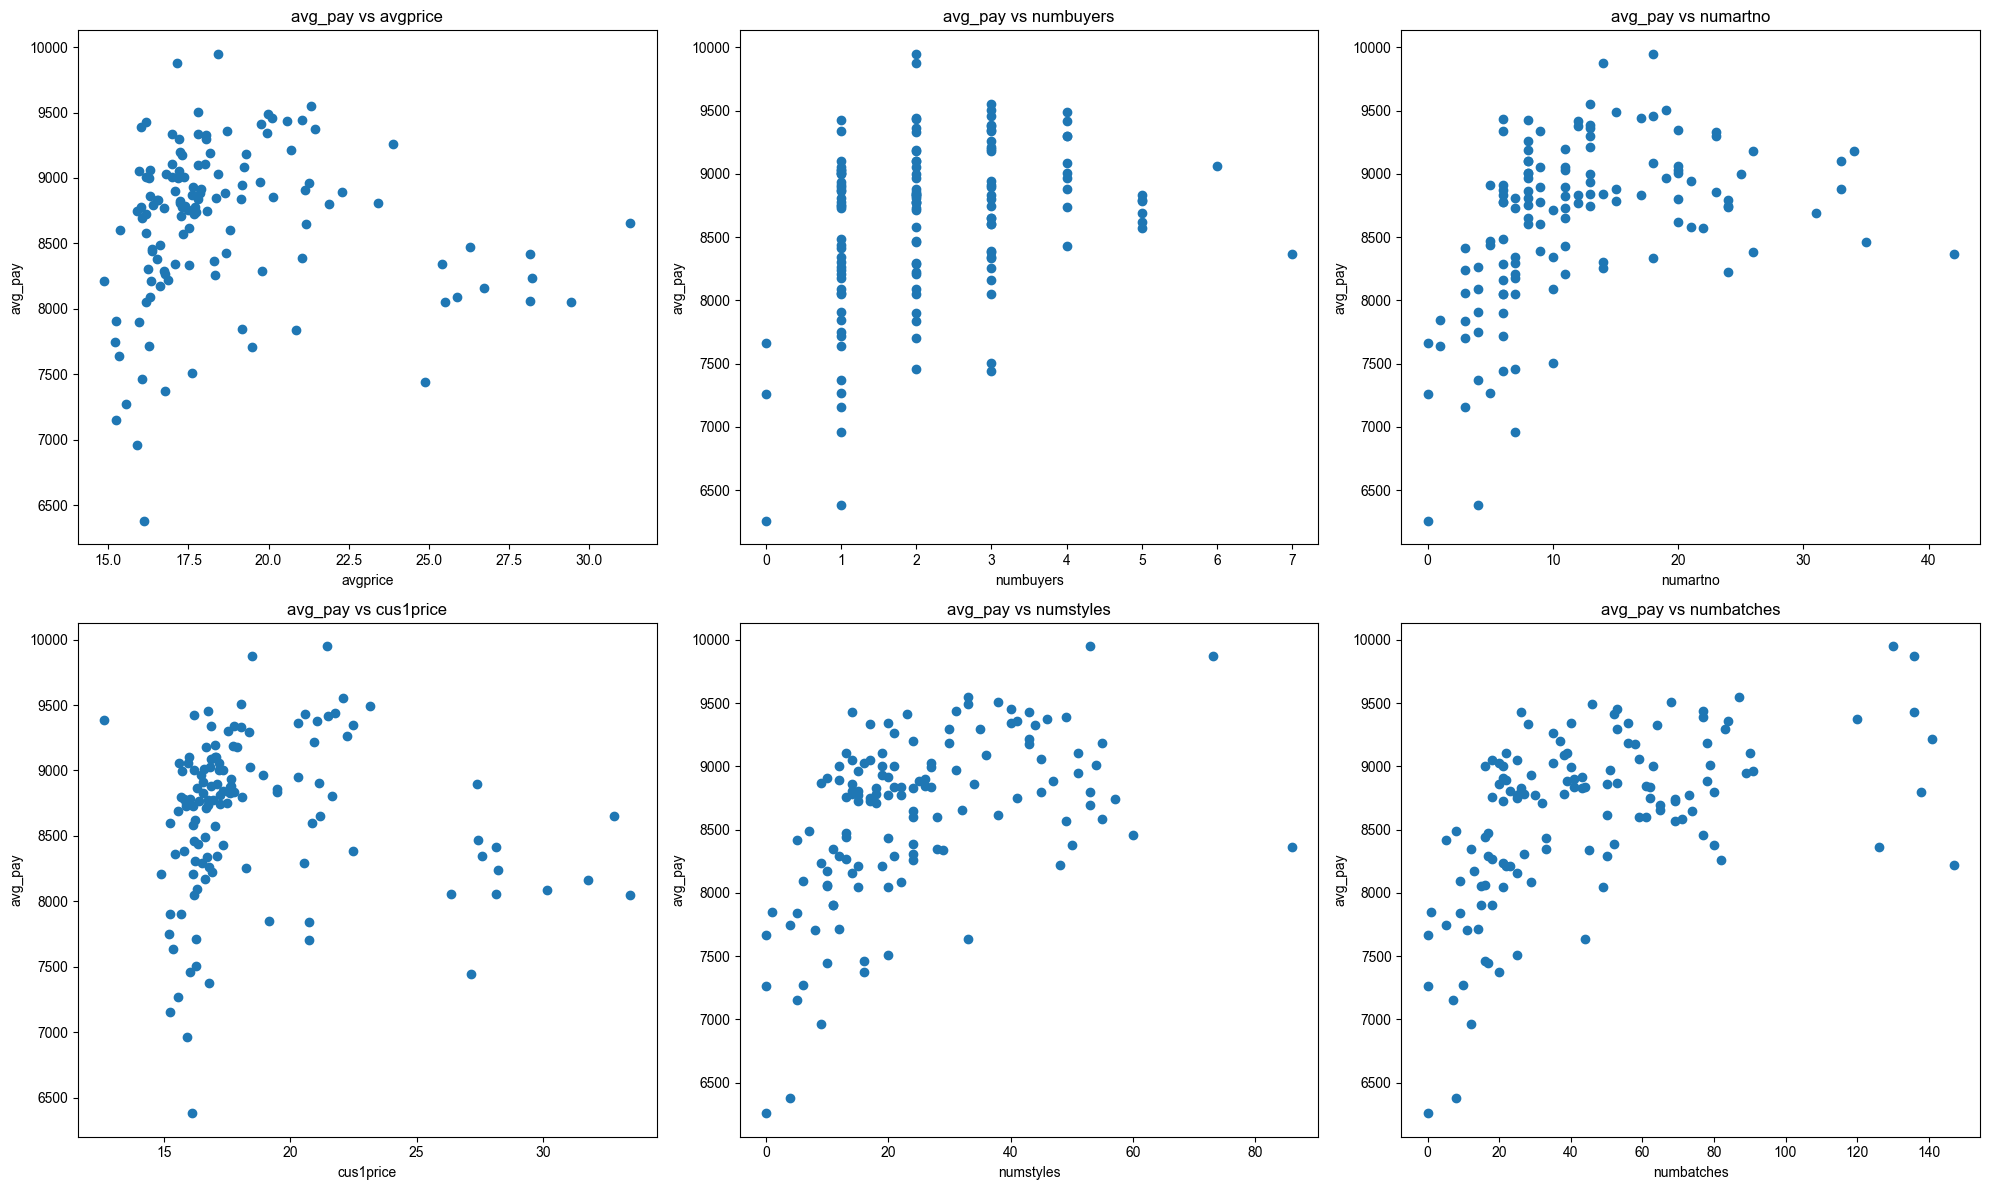

In [19]:
fig, axs = plt.subplots(2,3, figsize=(20, 12))
variables = ["avgprice", "cus1price", "numbuyers", "numstyles", "numartno", "numbatches"]
for i, var in enumerate(variables):
    ax = axs[i % 2,i // 2]
    df_plot = wages[[var, 'avg_pay']].dropna()
    ax.scatter(df_plot[var], df_plot['avg_pay'])
    ax.set_title(f'avg_pay vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('avg_pay')

fig.tight_layout()

plt.show()

In [20]:
wages[["avgprice", "cus1price", "numbuyers", "numstyles", "numartno", "numbatches",'avg_pay']].dropna().corr(method='pearson')

,avgprice,cus1price,numbuyers,numstyles,numartno,numbatches,avg_pay
avgprice,1.000000,0.942624,0.122623,-0.091611,-0.155590,0.031451,0.011459
cus1price,0.942624,1.000000,0.059066,-0.139830,-0.222293,-0.022477,-0.019790
numbuyers,0.122623,0.059066,1.000000,0.565033,0.544523,0.441974,0.256284
numstyles,-0.091611,-0.139830,0.565033,1.000000,0.825530,0.819930,0.463855
numartno,-0.155590,-0.222293,0.544523,0.825530,1.000000,0.583471,0.380395
numbatches,0.031451,-0.022477,0.441974,0.819930,0.583471,1.000000,0.498617
avg_pay,0.011459,-0.019790,0.256284,0.463855,0.380395,0.498617,1.000000
